# Preprocessing for LSTM model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

dfc_final = pd.read_csv("pm25_daily_final.csv")
# Scaling PM2.5
scaler = MinMaxScaler(feature_range=(0,1))
dfc_final["pm25_scaled"] = scaler.fit_transform(dfc_final[["pm25"]])

# Quick check
print(dfc_final.head())


                  Unnamed: 0        pm25  pm25_scaled
0  2016-11-09 00:00:00+00:00  311.600000     0.624886
1  2016-11-10 00:00:00+00:00  255.458333     0.511297
2  2016-11-11 00:00:00+00:00  261.125000     0.522762
3  2016-11-12 00:00:00+00:00  228.590909     0.456937
4  2016-11-13 00:00:00+00:00  168.625000     0.335610


## Sequence creation

In [2]:
# Convert series to supervised sequences
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Use the scaled series
series = dfc_final["pm25_scaled"].values
SEQ_LENGTH = 30  # past 30 days

X, y = create_sequences(series, SEQ_LENGTH)

print("Input shape:", X.shape)  # (samples, seq_length)
print("Output shape:", y.shape) # (samples,)


Input shape: (2879, 30)
Output shape: (2879,)


## Train test split

In [3]:
# 80/20 split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Train samples:", len(X_train))
print("Test samples:", len(X_test))


Train samples: 2303
Test samples: 576


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape input for LSTM (samples, timesteps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("Train reshaped:", X_train_reshaped.shape)
print("Test reshaped:", X_test_reshaped.shape)

# Building the LSTM model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Training the model
history = model.fit(
    X_train_reshaped, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Train reshaped: (2303, 30, 1)
Test reshaped: (576, 30, 1)


g:\Research\.venv310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0194 - val_loss: 0.0092
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0130 - val_loss: 0.0082
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0124 - val_loss: 0.0080
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117 - val_loss: 0.0076
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - val_loss: 0.0071
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - val_loss: 0.0068
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0104 - val_loss: 0.0069
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - val_loss: 0.0065
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - val_loss: 0.0066
Epoch 10/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - val_loss: 0.0063
Epoch 11/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - val_loss: 0.0068
Epoch 12/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - val_l

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RMSE: 31.190555525782358
MAE: 19.410958577645406


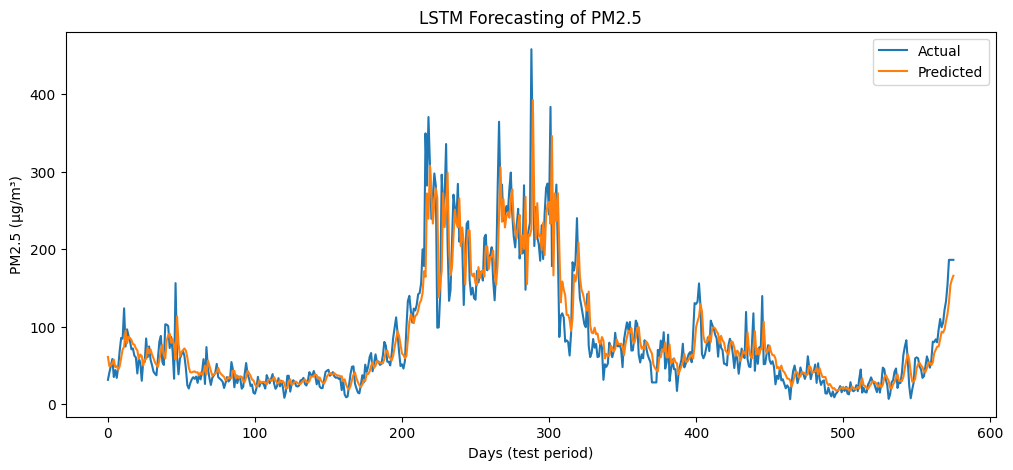

In [5]:
# Predictions
y_pred_scaled = model.predict(X_test_reshaped)

# Inverse scaling back to real PM2.5 values
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_inv = scaler.inverse_transform(y_pred_scaled)

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae  = mean_absolute_error(y_test_inv, y_pred_inv)

print("RMSE:", rmse)
print("MAE:", mae)

# Plot actual vs predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test_inv, label="Actual")
plt.plot(y_pred_inv, label="Predicted")
plt.title("LSTM Forecasting of PM2.5")
plt.xlabel("Days (test period)")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.show()


# Improved architecture

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

tf.random.set_seed(42)
np.random.seed(42)

def build_lstm_model(seq_len, n_features=1, units1=96, units2=48, dropout=0.2, lr=1e-3):
    model = Sequential([
        LSTM(units1, return_sequences=True, input_shape=(seq_len, n_features)),
        Dropout(dropout),
        LSTM(units2),
        Dropout(dropout),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mse', metrics=['mae'])
    return model

def train_model(model, X_train, y_train, epochs=80, batch_size=32, val_split=0.1):
    es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
    rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-5, verbose=1)
    ckpt = ModelCheckpoint('best_lstm.keras', monitor='val_loss', save_best_only=True)
    history = model.fit(
        X_train, y_train,
        epochs=epochs, batch_size=batch_size,
        validation_split=val_split,
        callbacks=[es, rlrop, ckpt],
        verbose=1
    )
    return history

def evaluate_model(model, X_test, y_test, scaler):
    y_pred_scaled = model.predict(X_test).reshape(-1, 1)
    y_test_scaled = y_test.reshape(-1, 1)

    # inverse scale to µg/m³
    y_pred = scaler.inverse_transform(y_pred_scaled).ravel()
    y_true = scaler.inverse_transform(y_test_scaled).ravel()

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae, y_true, y_pred

def plot_predictions(y_true, y_pred, title="LSTM Forecast (Test Set)"):
    plt.figure(figsize=(12,5))
    plt.plot(y_true, label="Actual")
    plt.plot(y_pred, label="Predicted")
    plt.title(title)
    plt.xlabel("Days (test period)")
    plt.ylabel("PM2.5 (µg/m³)")
    plt.legend()
    plt.show()

def plot_residuals(y_true, y_pred):
    resid = y_true - y_pred
    plt.figure(figsize=(12,4))
    plt.plot(resid)
    plt.axhline(0, color='k', lw=1)
    plt.title("Residuals over time")
    plt.xlabel("Time")
    plt.ylabel("Residuals")
    plt.show()
    print("Residuals — mean:", resid.mean(), " | std:", resid.std())



Epoch 1/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0181 - mae: 0.0851 - val_loss: 0.0092 - val_mae: 0.0652 - learning_rate: 0.0010
Epoch 2/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0143 - mae: 0.0749 - val_loss: 0.0084 - val_mae: 0.0625 - learning_rate: 0.0010
Epoch 3/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0138 - mae: 0.0732 - val_loss: 0.0080 - val_mae: 0.0588 - learning_rate: 0.0010
Epoch 4/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0130 - mae: 0.0713 - val_loss: 0.0076 - val_mae: 0.0576 - learning_rate: 0.0010
Epoch 5/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0127 - mae: 0.0697 - val_loss: 0.0077 - val_mae: 0.0561 - learning_rate: 0.0010
Epoch 6/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0122 - mae: 0.0677 - val_loss: 0.0075 - val_mae: 0.0551 - learning_rate: 0.0010
Epoch 7/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0117 - mae: 0.0660 - val_loss: 0.0070 - val_mae: 0.0541 - learning_rate: 0.0010
Epoch 8/80
65

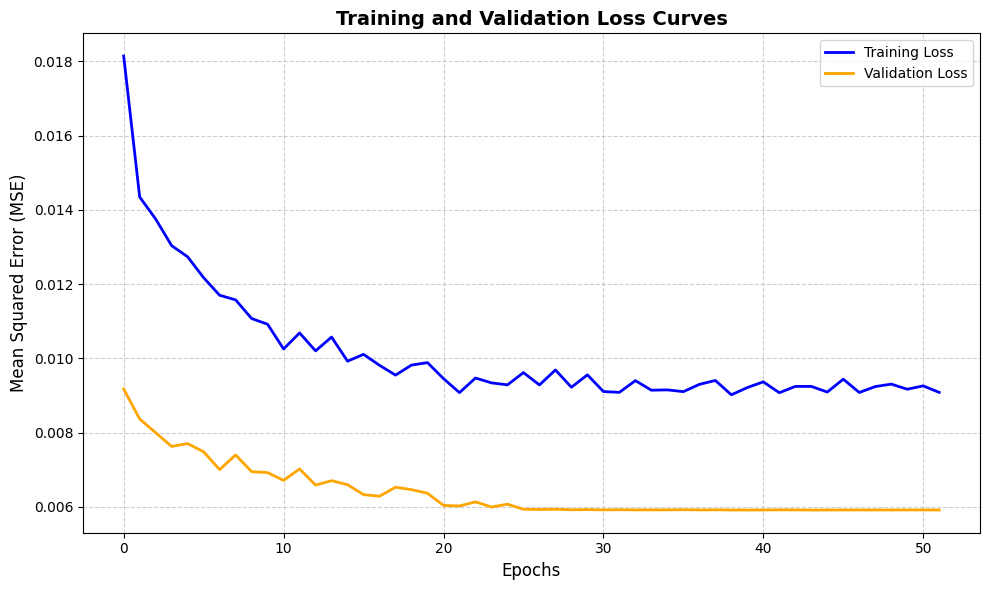

In [ ]:
# Train the model
model = build_lstm_model(seq_len=X_train_3d.shape[1], n_features=1, units1=96, units2=48, dropout=0.25, lr=1e-3)
history = train_model(model, X_train, y_train, epochs=80, batch_size=32)

import matplotlib.pyplot as plt

def plot_training_curves(history):
    """Training and validation loss curves plot"""
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
    plt.title("Training and Validation Loss Curves", fontsize=14, fontweight='bold')
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

plot_training_curves(history)


Epoch 1/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0201 - mae: 0.0894 - val_loss: 0.0097 - val_mae: 0.0663 - learning_rate: 0.0010
Epoch 2/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0150 - mae: 0.0762 - val_loss: 0.0088 - val_mae: 0.0652 - learning_rate: 0.0010
Epoch 3/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0141 - mae: 0.0737 - val_loss: 0.0082 - val_mae: 0.0625 - learning_rate: 0.0010
Epoch 4/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0133 - mae: 0.0723 - val_loss: 0.0078 - val_mae: 0.0601 - learning_rate: 0.0010
Epoch 5/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0126 - mae: 0.0690 - val_loss: 0.0076 - val_mae: 0.0570 - learning_rate: 0.0010
Epoch 6/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0124 - mae: 0.0682 - val_loss: 0.0075 - val_mae: 0.0562 - learning_rate: 0.0010
Epoch 7/80
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0120 - mae: 0.0671 - val_loss: 0.0075 - val_mae: 0.0553 - learning_rate: 0.0010
Epoch 8/80
65

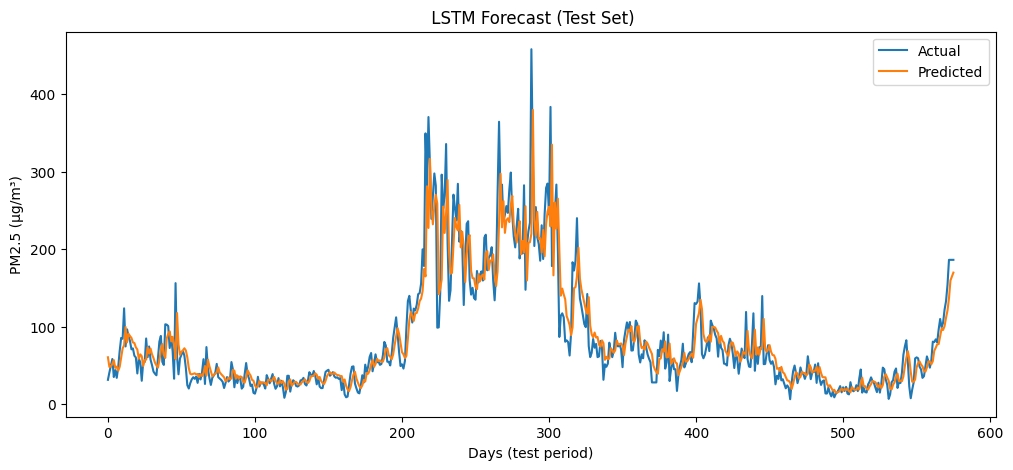

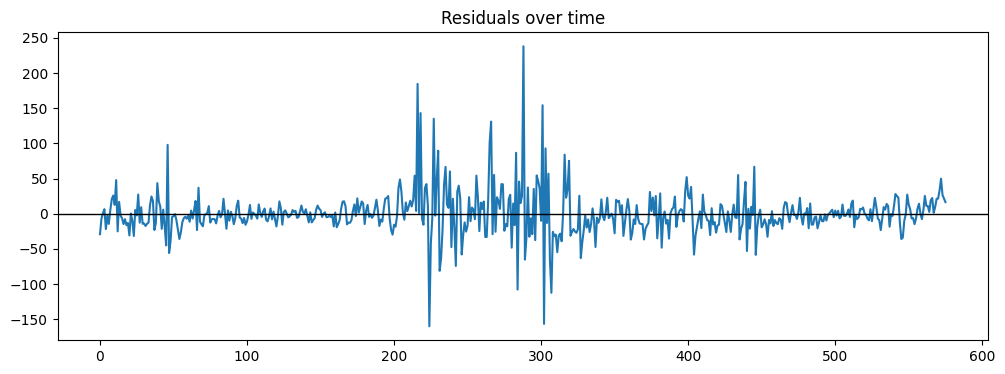

Residuals — mean: 0.05006185547566647  | std: 31.109477558322975


In [ ]:
# reshaping
X_train_3d = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_3d  = X_test.reshape((X_test.shape[0],  X_test.shape[1],  1))

model = build_lstm_model(seq_len=X_train_3d.shape[1], n_features=1, units1=96, units2=48, dropout=0.25, lr=1e-3)
history = train_model(model, X_train_3d, y_train, epochs=80, batch_size=32, val_split=0.1)

rmse, mae, y_true, y_pred = evaluate_model(model, X_test_3d, y_test, scaler)
print("Improved LSTM → RMSE:", rmse, " MAE:", mae)

plot_predictions(y_true, y_pred, title=" LSTM Forecast (Test Set)")
plot_residuals(y_true, y_pred)


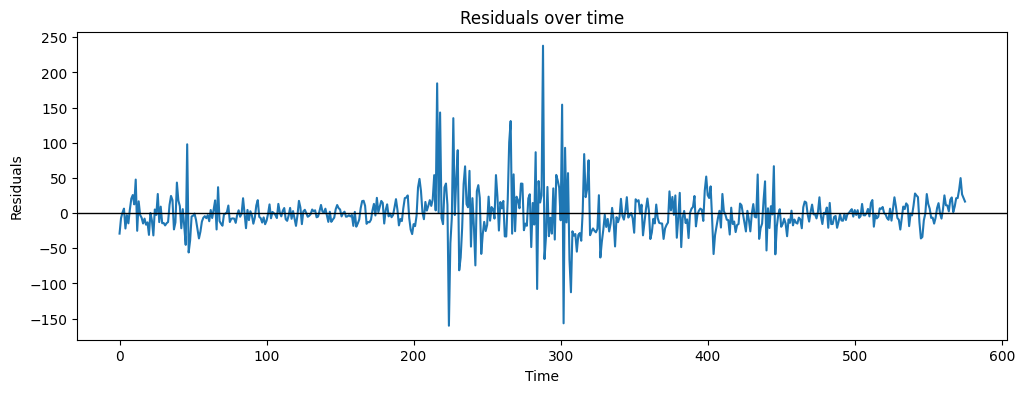

Residuals — mean: 0.05006185547566647  | std: 31.109477558322975


In [21]:
plot_residuals(y_true, y_pred)

In [ ]:
import os
os.makedirs("artifacts", exist_ok=True)

model.save("artifacts/best_lstm.keras")

import joblib
joblib.dump(scaler, "artifacts/scaler.joblib")




['artifacts/scaler.joblib']